In [25]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import normalize,to_categorical
from keras.datasets import mnist


In [29]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_test_img = x_test
x_train = normalize(x_train , axis = 1)
x_test = normalize(x_test , axis=1) 
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [27]:
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

In [10]:
model = Sequential()
model.add(Dense(units=512, input_shape=(784,), activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.fit(x=x_train, y=y_train, batch_size=512, epochs=100)
model.save('resources/mnist.h5')

Epoch 1/100
118/118 [==============================] - 7s 43ms/step - loss: 2.3011 - accuracy: 0.1117
Epoch 2/100
118/118 [==============================] - 5s 40ms/step - loss: 2.3001 - accuracy: 0.1132
Epoch 3/100
118/118 [==============================] - 3s 27ms/step - loss: 2.2956 - accuracy: 0.1230
Epoch 4/100
118/118 [==============================] - 3s 27ms/step - loss: 2.1951 - accuracy: 0.2162
Epoch 5/100
118/118 [==============================] - 3s 26ms/step - loss: 1.6592 - accuracy: 0.4253
Epoch 6/100
118/118 [==============================] - 3s 26ms/step - loss: 1.2938 - accuracy: 0.5292
Epoch 7/100
118/118 [==============================] - 3s 26ms/step - loss: 1.1742 - accuracy: 0.5749
Epoch 8/100
118/118 [==============================] - 3s 26ms/step - loss: 1.0949 - accuracy: 0.6097
Epoch 9/100
118/118 [==============================] - 3s 27ms/step - loss: 0.9681 - accuracy: 0.6668
Epoch 10/100
118/118 [==============================] - 3s 26ms/step - loss: 0.827

In [3]:
import numpy as np
import cv2
from keras.models import load_model

In [4]:
model = load_model('resources/mnist.h5')


In [5]:
import matplotlib.pyplot as plt
import numpy as np

def predict_img(path):  
        image = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (28,28))
        image = image.astype('float32')
        plt.imshow(np.squeeze(image))
        image = 255.0-image
        image /= 255.0
        image=image.reshape(1,-1)
        pred = model.predict(image)
        print('Prediction :::::> '+ str(np.argmax(pred)))

1/1 [==============================] - 0s 188ms/step
Prediction :::::> 0


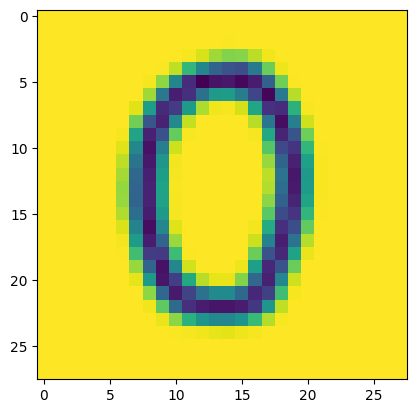

In [6]:
predict_img('images/zero.png')

1/1 [==============================] - 0s 78ms/step
Prediction :::::> 5


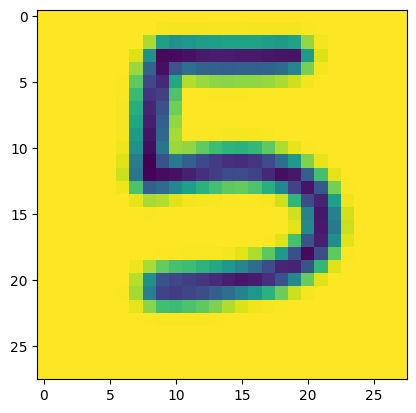

In [7]:
predict_img('images/five.png')


1/1 [==============================] - 0s 40ms/step
Prediction :::::> 3


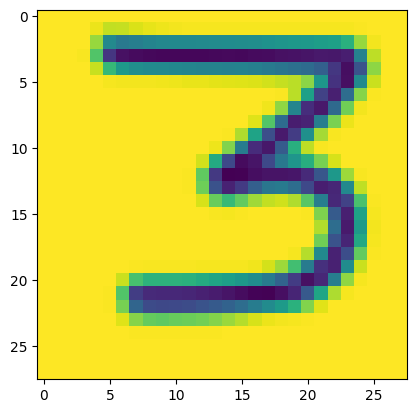

In [8]:
predict_img('images/three.png')

1/1 [==============================] - 0s 36ms/step
Prediction :::::> 1


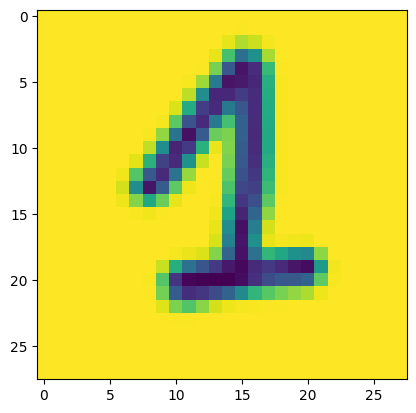

In [9]:
predict_img('images/one.png')